# Chengdu Air Quality Index project

data collected from US consulate in Chengdu, Sichuan, China.
- links to data used

original csv files were slightly altered, removed text at top and column with unrecognizable characters

### import data, clean, and concat into a tidy csv

In [1]:
%matplotlib inline

###import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## load and read data

In [2]:
cd_2012 = 'data/Chengdu_2012_HourlyPM25_created20140423.csv'
cd_2013 = 'data/Chengdu_2013_HourlyPM25_created20140423.csv'
cd_2014 = 'data/Chengdu_2014_HourlyPM25_created20150203.csv'
cd_2015 = 'data/Chengdu_2015_HourlyPM25_created20160201.csv'
cd_2016 = 'data/Chengdu_2016_HourlyPM25_created20170201.csv'
cd_2017 = 'data/Chengdu_2017_HourlyPM25_created20170803.csv'

csv_files = [cd_2012,cd_2013,cd_2014,cd_2015,cd_2016,cd_2017]

In [3]:
### concat csv's together 
frames = []

### for loop to read and append each csv
for csv in csv_files:
    df = pd.read_csv(csv, index_col='Date (LST)', parse_dates=True)
    frames.append(df)

cd_df = pd.concat(frames)

cd_df.head()

,Site,Parameter,Year,Month,Day,Hour,Value,Duration,QC Name
Date (LST),,,,,,,,,
2012-01-01 00:00:00,Chengdu,PM2.5,2012,1,1,0,-999,1 Hr,Missing
2012-01-01 01:00:00,Chengdu,PM2.5,2012,1,1,1,-999,1 Hr,Missing
2012-01-01 02:00:00,Chengdu,PM2.5,2012,1,1,2,-999,1 Hr,Missing
2012-01-01 03:00:00,Chengdu,PM2.5,2012,1,1,3,-999,1 Hr,Missing
2012-01-01 04:00:00,Chengdu,PM2.5,2012,1,1,4,-999,1 Hr,Missing


In [4]:
cd_df.tail()

,Site,Parameter,Year,Month,Day,Hour,Value,Duration,QC Name
Date (LST),,,,,,,,,
2017-06-30 19:00:00,Chengdu,PM2.5,2017,6,30,19,33,1 Hr,Valid
2017-06-30 20:00:00,Chengdu,PM2.5,2017,6,30,20,29,1 Hr,Valid
2017-06-30 21:00:00,Chengdu,PM2.5,2017,6,30,21,37,1 Hr,Valid
2017-06-30 22:00:00,Chengdu,PM2.5,2017,6,30,22,32,1 Hr,Valid
2017-06-30 23:00:00,Chengdu,PM2.5,2017,6,30,23,32,1 Hr,Valid


In [5]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48192 entries, 2012-01-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 9 columns):
Site         48192 non-null object
Parameter    48192 non-null object
Year         48192 non-null int64
Month        48192 non-null int64
Day          48192 non-null int64
Hour         48192 non-null int64
Value        48192 non-null int64
Duration     48192 non-null object
QC Name      48192 non-null object
dtypes: int64(5), object(4)
memory usage: 3.7+ MB


In [6]:
cd_df = cd_df.rename(columns={'QC Name': 'qc_name'})

### remove rows missing values
cd_df = cd_df[cd_df.qc_name != 'Missing']

cd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41786 entries, 2012-05-14 14:00:00 to 2017-06-30 23:00:00
Data columns (total 9 columns):
Site         41786 non-null object
Parameter    41786 non-null object
Year         41786 non-null int64
Month        41786 non-null int64
Day          41786 non-null int64
Hour         41786 non-null int64
Value        41786 non-null int64
Duration     41786 non-null object
qc_name      41786 non-null object
dtypes: int64(5), object(4)
memory usage: 3.2+ MB


In [7]:
cd_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41786 entries, 2012-05-14 14:00:00 to 2017-06-30 23:00:00
Data columns (total 9 columns):
Site         41786 non-null object
Parameter    41786 non-null object
Year         41786 non-null int64
Month        41786 non-null int64
Day          41786 non-null int64
Hour         41786 non-null int64
Value        41786 non-null int64
Duration     41786 non-null object
qc_name      41786 non-null object
dtypes: int64(5), object(4)
memory usage: 11.8 MB


In [8]:
cd_df.columns

Index(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'Value',
       'Duration', 'qc_name'],
      dtype='object')

In [9]:
thinned_cols = ['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'Value']

thin_cd_df = cd_df.loc[:,thinned_cols]

thin_cd_df.head()

,Site,Parameter,Year,Month,Day,Hour,Value
Date (LST),,,,,,,
2012-05-14 14:00:00,Chengdu,PM2.5,2012,5,14,14,46
2012-06-04 23:00:00,Chengdu,PM2.5,2012,6,4,23,69
2012-06-05 15:00:00,Chengdu,PM2.5,2012,6,5,15,98
2012-06-05 16:00:00,Chengdu,PM2.5,2012,6,5,16,89
2012-06-05 17:00:00,Chengdu,PM2.5,2012,6,5,17,66


In [10]:
thin_cd_df.tail()

,Site,Parameter,Year,Month,Day,Hour,Value
Date (LST),,,,,,,
2017-06-30 19:00:00,Chengdu,PM2.5,2017,6,30,19,33
2017-06-30 20:00:00,Chengdu,PM2.5,2017,6,30,20,29
2017-06-30 21:00:00,Chengdu,PM2.5,2017,6,30,21,37
2017-06-30 22:00:00,Chengdu,PM2.5,2017,6,30,22,32
2017-06-30 23:00:00,Chengdu,PM2.5,2017,6,30,23,32


In [11]:
thin_cd_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41786 entries, 2012-05-14 14:00:00 to 2017-06-30 23:00:00
Data columns (total 7 columns):
Site         41786 non-null object
Parameter    41786 non-null object
Year         41786 non-null int64
Month        41786 non-null int64
Day          41786 non-null int64
Hour         41786 non-null int64
Value        41786 non-null int64
dtypes: int64(5), object(2)
memory usage: 6.9 MB


In [12]:
thin_cd_df.Site = thin_cd_df.Site.astype('category')
thin_cd_df.Parameter = thin_cd_df.Parameter.astype('category')

In [13]:
thin_cd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41786 entries, 2012-05-14 14:00:00 to 2017-06-30 23:00:00
Data columns (total 7 columns):
Site         41786 non-null category
Parameter    41786 non-null category
Year         41786 non-null int64
Month        41786 non-null int64
Day          41786 non-null int64
Hour         41786 non-null int64
Value        41786 non-null int64
dtypes: category(2), int64(5)
memory usage: 2.0 MB


In [14]:
thin_cd_df.to_csv('data/CD_AQI.csv')

## use tidy data for visualizations

In [17]:
df = pd.read_csv('data/CD_AQI.csv', index_col='Date (LST)', parse_dates=True)

df.head()

,Site,Parameter,Year,Month,Day,Hour,Value
Date (LST),,,,,,,
2012-05-14 14:00:00,Chengdu,PM2.5,2012,5,14,14,46
2012-06-04 23:00:00,Chengdu,PM2.5,2012,6,4,23,69
2012-06-05 15:00:00,Chengdu,PM2.5,2012,6,5,15,98
2012-06-05 16:00:00,Chengdu,PM2.5,2012,6,5,16,89
2012-06-05 17:00:00,Chengdu,PM2.5,2012,6,5,17,66


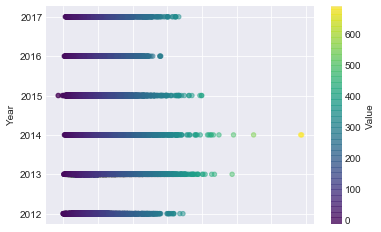

In [39]:
df.plot.scatter('Value', 'Year', c='Value', colormap='viridis', alpha=0.5)

plt.show()

In [30]:
df.Value.max()

688